In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler

In [2]:
# Libraries for building artificial neural networks
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from keras.layers import Dense, Flatten, Reshape, Input

2026-01-12 11:29:21.164831: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-12 11:29:21.664215: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-12 11:29:23.591672: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


# Implementando autoencoders usando la librería Keras

En esta práctica, construiremos varias arquitecturas de autoencoders y utilizaremos las representaciones obtenidas en diferentes aplicaciones, desde la reducción de dimensionalidad hasta la visualización de datos.

Con la ayuda de Keras, una biblioteca de alto nivel para la construcción y el entrenamiento de redes neuronales, implementaremos un autoencoder desde cero. Durante esta práctica, se abordarán los conceptos clave que subyacen a los autoencoders, como la codificación, la decodificación y la reconstrucción de datos, mientras aplicas estos conceptos a un conjunto de datos real.


En primer lugar, descargamos e importamos los datos. Para esta práctica usaremos el dataset MNIST.

In [10]:
# Load the MNIST data set
(x_train_raw, y_train), (x_test_raw, y_test) = tf.keras.datasets.mnist.load_data()
print('x-train {}, y-train: {}'.format(x_train_raw.shape, y_train.shape))
print('x-test: {}, y-test: {}'.format(x_test_raw.shape, y_test.shape))

x-train (60000, 28, 28), y-train: (60000,)
x-test: (10000, 28, 28), y-test: (10000,)


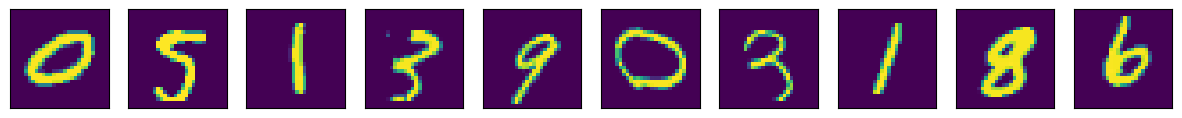

In [7]:
# Take a look at the dataset and visualize samples of input data
n_samples = 10
idx = random.sample(range(x_train_raw.shape[0]), n_samples)
plt.figure(figsize=(15,4))
for i in range(n_samples):
    plt.subplot(1, n_samples, i+1)
    plt.imshow(x_train_raw[idx[i]].squeeze());
    plt.xticks([], [])
    plt.yticks([], [])

In [8]:
# Normalize pixel values to [0., 1.]
x_train = x_train_raw / 255.
x_test = x_test_raw / 255.

In [30]:
activation_function = 'relu'

In [31]:
# This is the dimension of the latent space (encoding space)
latent_dim = 2

# Images are 28 by 28
img_shape = (x_train.shape[1], x_train.shape[2])

encoder = Sequential([
    Flatten(input_shape=img_shape),
    Dense(192, activation=activation_function),
    Dense(64, activation=activation_function),
    Dense(32, activation=activation_function),
    Dense(latent_dim, name='encoder_output')
])

decoder = Sequential([
    Dense(32, activation=activation_function, input_shape=(latent_dim,)),
    Dense(64, activation=activation_function),
    Dense(192, activation=activation_function),
    Dense(img_shape[0] * img_shape[1], activation=activation_function),
    Reshape(img_shape)
])

In [32]:
# Autoencoder
input_img = Input(shape=img_shape)
encoded = encoder(input_img)
reconstructed_img = decoder(encoded)
autoencoder = Model(inputs=input_img, outputs=reconstructed_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
encoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 192)                 │         150,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_output (Dense)               │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 165,218 (645.38 KB)

 Trainable params: 165,218 (645.38 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
decoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 32)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 192)                 │          12,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 784)                 │         151,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 28, 28)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 166,000 (648.44 KB)

 Trainable params: 166,000 (648.44 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 2)                   │         165,218 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 28, 28)              │         166,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 331,218 (1.26 MB)

 Trainable params: 331,218 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
class TestEncoder(tf.keras.callbacks.Callback):
    def __init__(self, x_test, y_test):
        super(TestEncoder, self).__init__()
        self.x_test = x_test
        self.y_test = y_test
        self.current_epoch = 0

    def on_epoch_begin(self, epoch, logs={}):
        self.current_epoch = self.current_epoch + 1
        if self.current_epoch % 1 == 0:
          encoder_model = Model(inputs=self.model.input,
                                outputs=self.model.get_layer('encoder_output').output)
          encoder_output = encoder_model(self.x_test)
          plt.subplot(4, 3, self.current_epoch)
          plt.scatter(encoder_output[:, 0],
                      encoder_output[:, 1], s=20, alpha=0.8,
                      cmap='Set1', c=self.y_test[0:x_test.shape[0]])
          plt.xlim(-9, 9)
          plt.ylim(-9, 9)
          plt.xlabel('Latent Dimension 1')
          plt.ylabel('Latent Dimension 2')

In [33]:
class TestEncoder(tf.keras.callbacks.Callback):
    def __init__(self, encoder, x_test, y_test):
        super(TestEncoder, self).__init__()
        self.encoder = encoder  # Pasa directamente el modelo del codificador
        self.x_test = x_test
        self.y_test = y_test
        self.current_epoch = 0

    def on_epoch_begin(self, epoch, logs=None):
        self.current_epoch += 1
        if self.current_epoch % 1 == 0:
            # Generar salida codificada
            encoder_output = self.encoder.predict(self.x_test)

            # Configurar el tamaño de la figura
            if self.current_epoch == 1:
                plt.figure(figsize=(15, 15))

            # Trazar los datos en el espacio latente
            plt.subplot(4, 3, self.current_epoch)
            scatter = plt.scatter(
                encoder_output[:, 0],
                encoder_output[:, 1],
                s=20,
                alpha=0.8,
                c=self.y_test[:self.x_test.shape[0]],
                cmap='Set1'
            )
            plt.xlim(-9, 9)
            plt.ylim(-9, 9)
            plt.xlabel('Latent Dimension 1')
            plt.ylabel('Latent Dimension 2')

        # Mostrar los gráficos al final de todas las épocas
        if self.current_epoch == 12:  # Cambia 12 según el número de épocas deseadas
            plt.colorbar(scatter)
            plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Figure size 1500x1500 with 0 Axes>

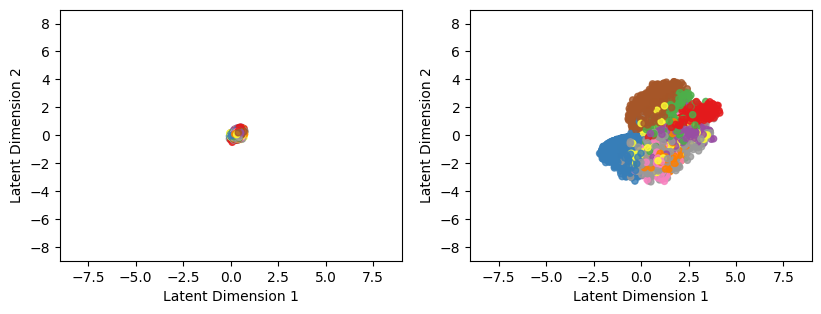

In [34]:
plt.figure(figsize=(15,15))
# model_history = autoencoder.fit(x_train, x_train, epochs=1, batch_size=32, verbose=0, callbacks=[TestEncoder(x_test[0:500], y_test[0:500])])

callback = TestEncoder(encoder=encoder, x_test=x_test, y_test=y_test)

# Entrenamiento del modelo
model_history = autoencoder.fit(
    x_train, x_train,
    epochs=2,  # Ajusta según sea necesario
    batch_size=32,
    verbose=0,
    callbacks=[callback]
)

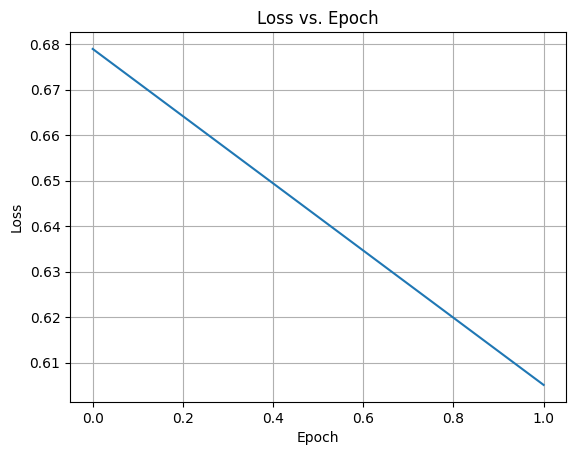

In [35]:
plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

In [36]:
# Check dimensionality of input data and latent representations
x_train_reconstructed = autoencoder.predict(x_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [37]:
x_embedded = encoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [38]:
x_embedded.shape

(10000, 2)

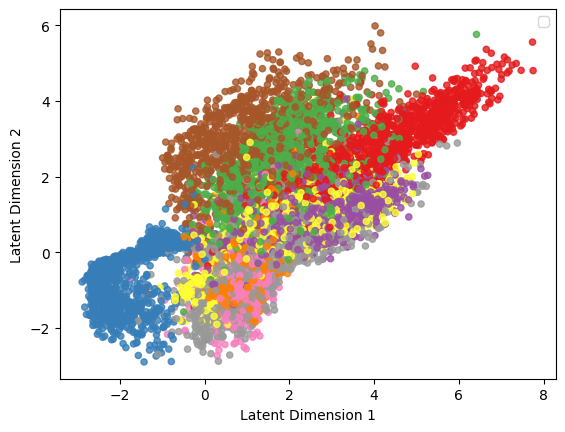

In [39]:
plt.scatter(x_embedded[:, 0],
            x_embedded[:, 1], s=20, alpha=0.8,
            cmap='Set1', c=y_test[0:x_test.shape[0]])
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.legend()

## Denoising convolutional autoencoder

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import to_categorical

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [ ]:
input_dim = 784
x_train = x_train.reshape(-1, input_dim)
x_test = x_test.reshape(-1, input_dim)

In [ ]:
encoding_dim = 32
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

In [ ]:
autoencoder.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 784)                 │          25,872 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# Training autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.3867 - val_loss: 0.1869
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1773 - val_loss: 0.1520
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1483 - val_loss: 0.1335
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1317 - val_loss: 0.1216
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1204 - val_loss: 0.1131
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1128 - val_loss: 0.1070
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1072 - val_loss: 0.1028
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1030 - val_loss: 0.0994
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.1000 - val_loss: 0.0973
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0980 - val_loss: 0.0957
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0968 - val_loss: 0.0948
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Extract latent representations
encoder = Model(input_img, encoded)
x_train_encoded = encoder.predict(x_train)
x_test_encoded = encoder.predict(x_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print('x-train: {}'.format(x_train.shape))
print('x-train-encoded: {}'.format(x_train_encoded.shape))
print('x-test: {}'.format(x_test.shape))
print('x-test-encoded: {}'.format(x_test.shape))

x-train: (60000, 784)
x-train-encoded: (60000, 32)
x-test: (10000, 784)
x-test-encoded: (10000, 784)


In [ ]:
# Create a ANN classifier
clf_input_dim = encoding_dim
clf_output_dim = 10
clf_input = Input(shape=(clf_input_dim,))
clf_output = Dense(clf_output_dim, activation='softmax')(clf_input)
classifier = Model(clf_input, clf_output)

In [ ]:
# Compile classifier
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
y_train_categorical = to_categorical(y_train, num_classes=clf_output_dim)
y_test_categorical = to_categorical(y_test, num_classes=clf_output_dim)
history = classifier.fit(x_train_encoded, y_train_categorical,
               epochs=30,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test_encoded, y_test_categorical))

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2111 - loss: 7.1212 - val_accuracy: 0.4743 - val_loss: 2.0830
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5232 - loss: 1.8096 - val_accuracy: 0.6657 - val_loss: 1.1566
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6840 - loss: 1.0814 - val_accuracy: 0.7560 - val_loss: 0.7901
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7654 - loss: 0.7827 - val_accuracy: 0.8107 - val_loss: 0.6171
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8120 - loss: 0.6207 - val_accuracy: 0.8402 - val_loss: 0.5239
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8405 - loss: 0.5391 - val_accuracy: 0.8600 - val_loss: 0.4655
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8540 - loss: 0.4878 - val_accuracy: 0.8734 - val_loss: 0.4305
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8651 - loss: 0.4554 - val_accuracy: 0.

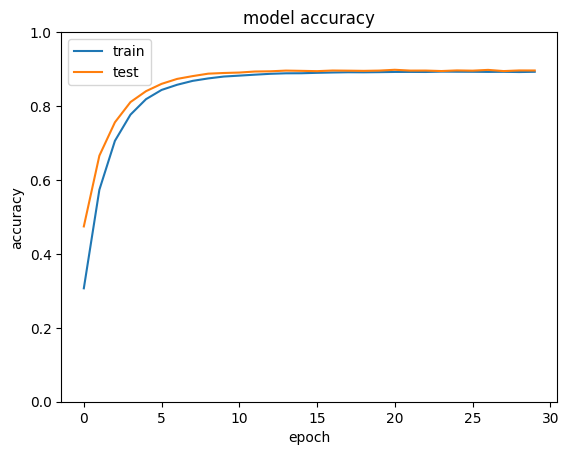

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0, 1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()


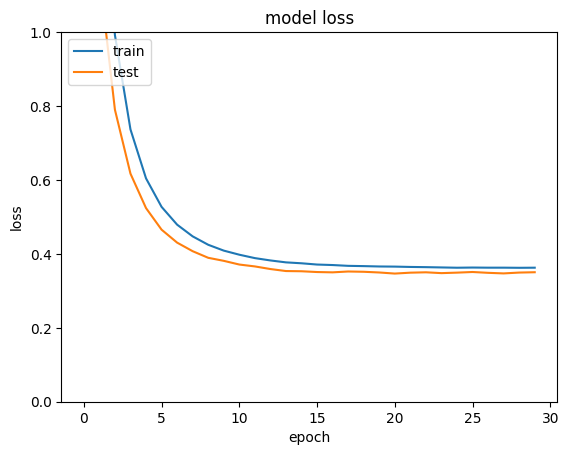

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0, 1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Convolutional autoencoder

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras.datasets import mnist
from keras.models import Model

In [ ]:
def preprocess_data(array):
    """Normalizes the supplied array and reshapes it."""
    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array

In [ ]:
def add_noise(array):
    """Adds random noise to each image in the supplied array."""
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)

In [ ]:
def display(array1, array2):
    """Displays ten random images from each array."""
    n = 10
    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [ ]:
# Load train and test subsets
(train_data, _), (test_data, _) = mnist.load_data()
print('x-train: ', train_data.shape)
print('x-test', train_data.shape)

x-train:  (60000, 28, 28)
x-test (60000, 28, 28)


In [ ]:
# Normalize and reshape the data
train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

In [ ]:
# Create a copy of the data with added noise
noisy_train_data = add_noise(train_data)
noisy_test_data = add_noise(test_data)

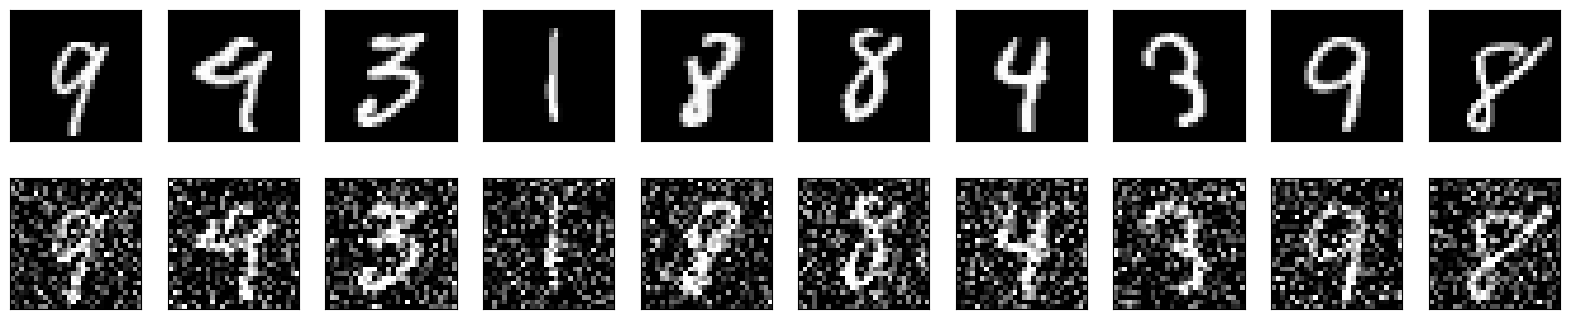

In [ ]:
# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

In [ ]:
# Build the autoencoder
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

In [ ]:
# Autoencoder Building and Summary of the Architecture
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 146s 303ms/step - loss: 0.2850 - val_loss: 0.1048
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 192s 283ms/step - loss: 0.1033 - val_loss: 0.0973
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 130s 276ms/step - loss: 0.0975 - val_loss: 0.0946
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 272ms/step - loss: 0.0950 - val_loss: 0.0927
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 273ms/step - loss: 0.0934 - val_loss: 0.0916
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 134s 285ms/step - loss: 0.0922 - val_loss: 0.0909
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 287ms/step - loss: 0.0915 - val_loss: 0.0900
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 138s 279ms/step - loss: 0.0905 - val_loss: 0.0893
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 278ms/step - loss: 0.0896 - val_loss: 0.0888
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 280ms/step - loss: 0.0894 - val_loss: 0.0884


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


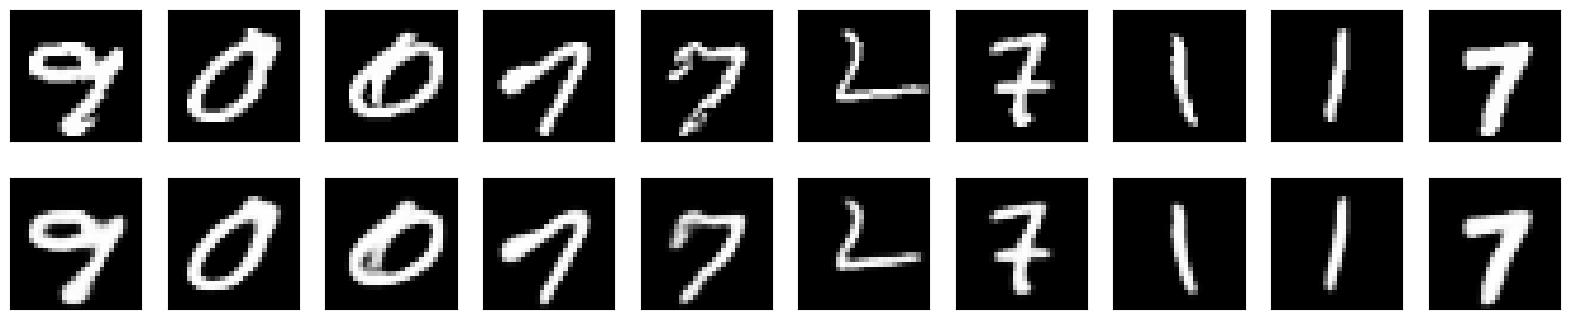

In [ ]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)